# NN Model (Without Libraries)

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import cv2

# Distribution: R = 512, F = 728, L = 468 ; Total = 1708

In [2]:
# Loading dataset

X = np.genfromtxt("Training_Data.csv", delimiter =',')  
Y = np.genfromtxt("Training_Labels.csv", delimiter =',')   

# train_X = np.load("data1/train_X.npy")
# train_Y = np.load("data1/train_y.npy")
# test_X = np.load("data1/test_X.npy")
# test_Y = np.load("data1/test_y.npy")

In [3]:
class neuralNetwork:
    
    # initializing the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningRate):
          
        # structure of neural network
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # set learning rate
        self.lr = learningRate
        
        # Sigmoid activation function        
        self.sigmoid = lambda x: scipy.special.expit(x)
        
        # link weight matrices, wih and who
        self.wih = (np.random.rand(self.hnodes,self.inodes)- 0.5)
        self.who = (np.random.rand(self.onodes, self.hnodes) - 0.5)
         
        pass
    
    # training the neural network
    def train(self, input_list, target_list):
        
        inputs = input_list
        targets = target_list
        
        inputs = np.reshape(inputs, (len(input_list),1))
        targets = np.reshape(targets, (len(target_list),1))        
        
        # feedforward algorithm        
        hidden_z = np.dot(self.wih, inputs)
        hidden_activation = self.sigmoid(hidden_z)
        output_z = np.dot(self.who,hidden_activation)
        final_outputs = self.sigmoid(output_z)
        
        # finding errors
        output_errors = targets - final_outputs 
        hidden_errors = np.dot(np.transpose(self.who), output_errors)
        
        # updating weights using Backpropagation                        
        self.who = self.who + self.lr * np.dot(output_errors * final_outputs * (1.0-final_outputs) , np.transpose(hidden_activation))
        self.wih = self.wih + self.lr * np.dot((hidden_errors* hidden_activation*(1.0-hidden_activation)), np.transpose(inputs))
        
        pass
    
    # testing the neural network
    def  querry(self, inputs):
        
        inputs = np.reshape(inputs, (len(inputs),1))
        hidden_z = np.dot(self.wih, inputs)
        hidden_activation = self.sigmoid(hidden_z)
        output_z = np.dot(self.who,hidden_activation)
        final_outputs = self.sigmoid(output_z)
        
        return final_outputs

In [4]:
X.shape, Y.shape

((1708, 44800), (1708,))

In [7]:
train_X = X[0:1500,:]
train_Y = Y[0:1500]
test_X = X[1500:,:]
test_Y = Y[1500:]

row = 140
col = 320

Train X : 

[[ 50.  98. 101. ...  79.  80.  80.]
 [ 52. 102. 102. ...  68.  68.  68.]
 [ 70. 143. 136. ...  58.  58.  58.]
 ...
 [ 66. 132. 133. ... 236. 236. 236.]
 [ 64. 128. 132. ... 237. 237. 237.]
 [ 63. 126. 128. ... 238. 238. 238.]]
(1500, 44800)

Train Y :
[0. 2. 2. 0. 0. 0. 2. 2. 2. 1. 1. 1. 2. 0. 0. 0. 2. 2. 2. 1. 0. 0. 2. 2.
 0. 0. 0. 2. 2. 2. 2. 0. 0. 0. 2. 2. 0. 2. 2. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 2.
 1. 0. 0. 1.]
(1500,)

Test X : 

[[ 66. 133. 137. ... 238. 238. 238.]
 [ 65. 131. 133. ... 241. 241. 241.]
 [ 66. 132. 135. ... 240. 240. 240.]
 ...
 [ 53. 105. 105. ...  41.  42.  42.]
 [ 62. 125. 127. ...  37.  36.  36.]
 [ 39.  80.  84. ...  54.  53.  54.]]
(208, 44800)

Test Y : 

[2. 2. 0. 1. 0. 2. 0. 0. 1. 1. 2. 2. 2. 1. 2. 0. 1. 1. 1. 1. 2. 0. 0. 0.
 0. 2. 0. 0. 0. 2. 2. 1. 1. 0. 2. 0. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 0.
 0. 0. 1. 

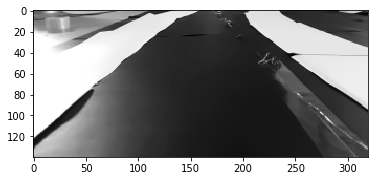

Text(0.5,1,'right')

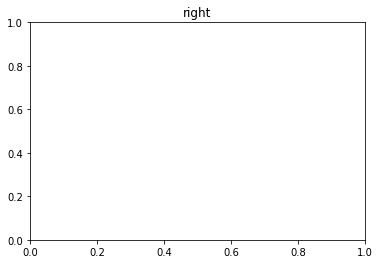

In [10]:
# Glimpse of online dataset 

labels = ["forward", "left", "right"]

print("Train X : \n")
print(train_X)
print(train_X.shape)
print("\nTrain Y :")
print(train_Y[0:100])
print(train_Y.shape)
print("\nTest X : \n")
print(test_X)
print(test_X.shape)
print("\nTest Y : \n")
print(test_Y[0:100])
print(test_Y.shape)

img = np.reshape(train_X[1], (row,col))
plt.imshow(img, cmap='gray')
plt.title(labels[int(train_Y[1])])
plt.show()




In [16]:
# Definition of neural network 
input_nodes =  row*col 
hidden_nodes = 64
output_nodes = 3
epochs = 5

# learning rate
learning_rate = 0.001

# create an instance of the neural network
net = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [17]:
# train the network
for e in range(epochs):    
      
    index = -1;     
    for record in train_X:
        index = index + 1
        #sample = cv2.cvtColor(np.reshape(record, (45,80, 3)), cv2.COLOR_BGR2GRAY)
        sample = record.reshape((record.size,1))
        input_list = (np.asfarray(sample[:]) / 255.0) 
        target_list = np.zeros(output_nodes) + 0.01
        target_list[int(train_Y[index])] = 0.99
        net.train(input_list,target_list)        
        pass
    
    # shuffle data
    
    pass

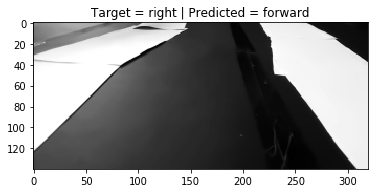

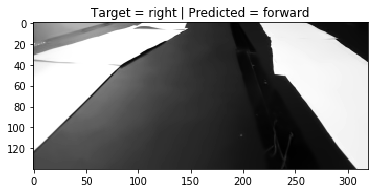

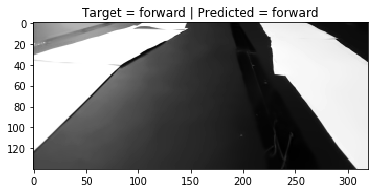

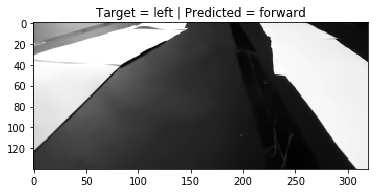

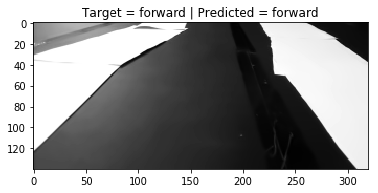

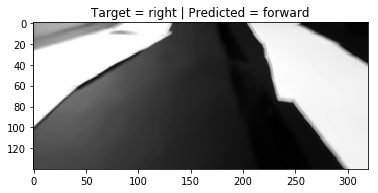

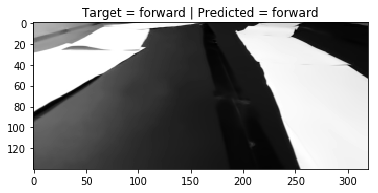

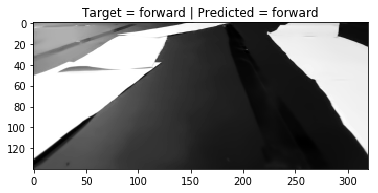

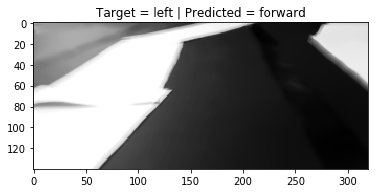

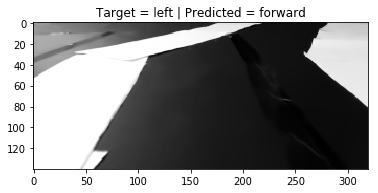

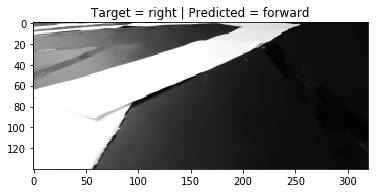

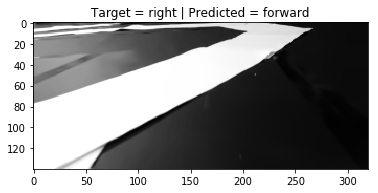

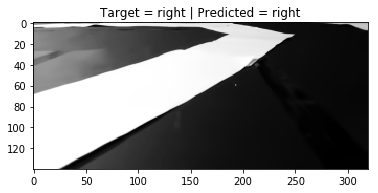

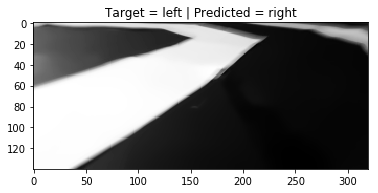

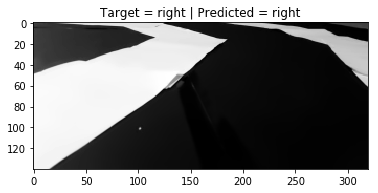

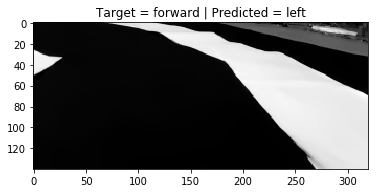

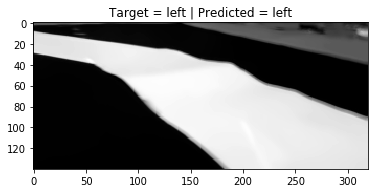

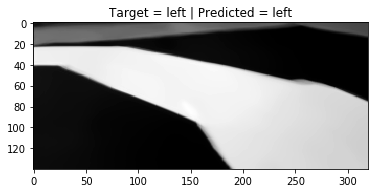

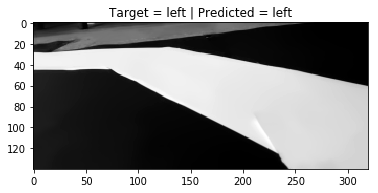

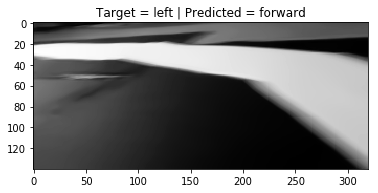

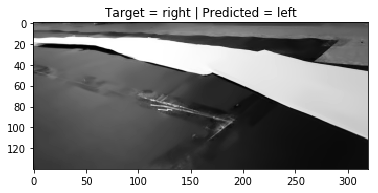

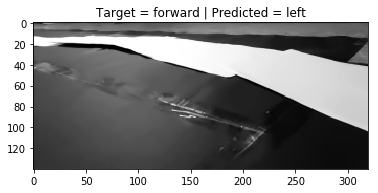

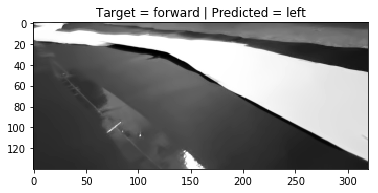

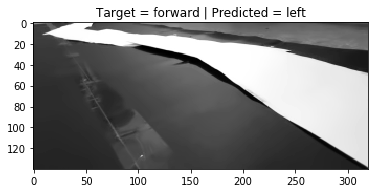

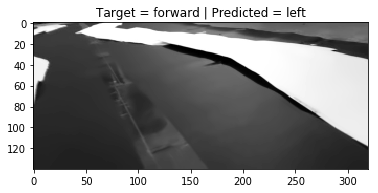

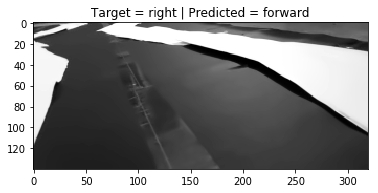

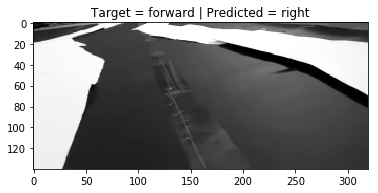

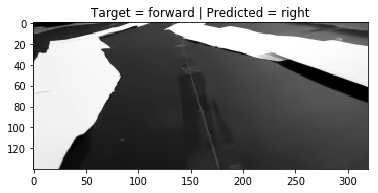

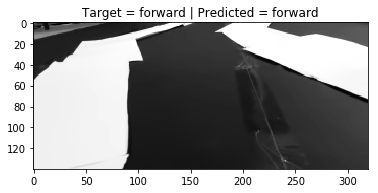

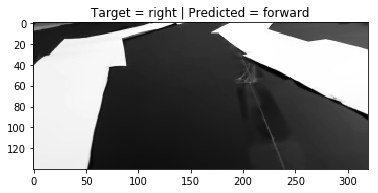

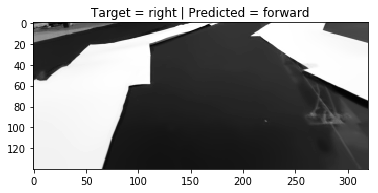

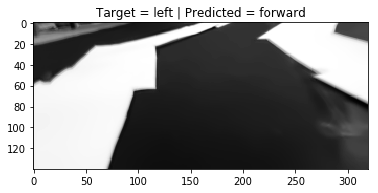

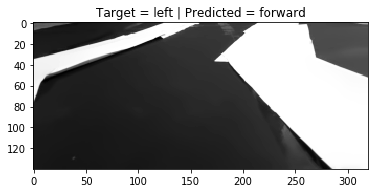

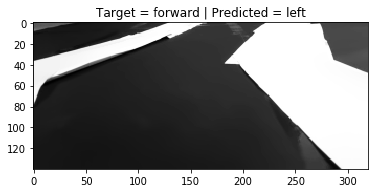

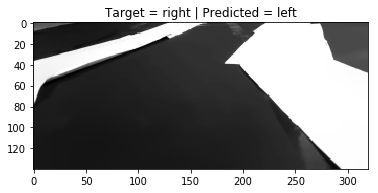

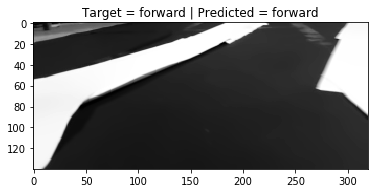

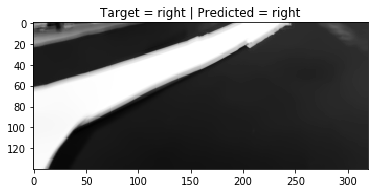

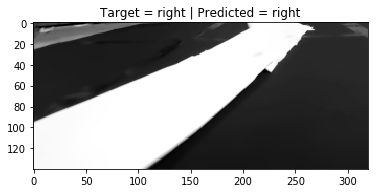

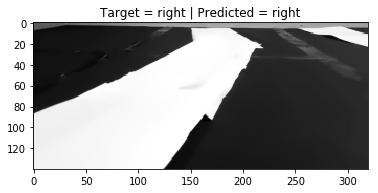

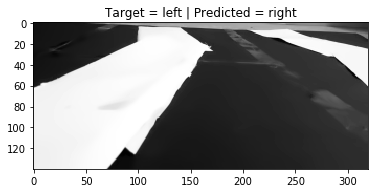

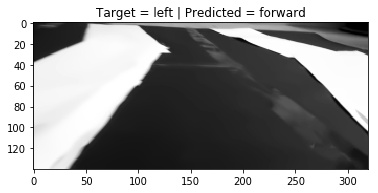

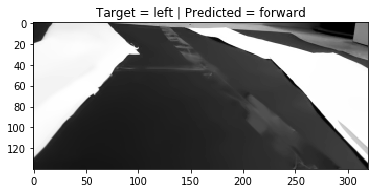

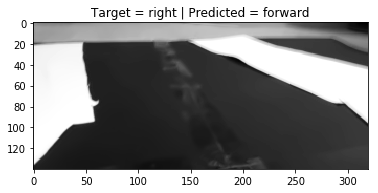

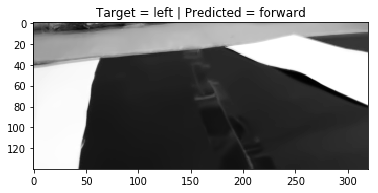

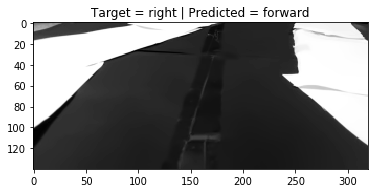

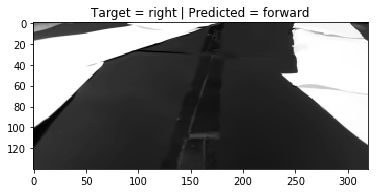

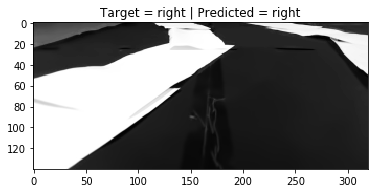

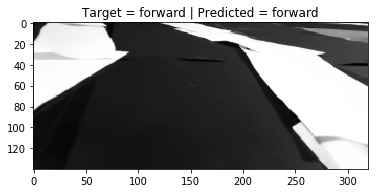

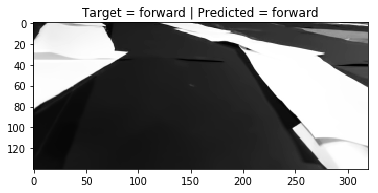

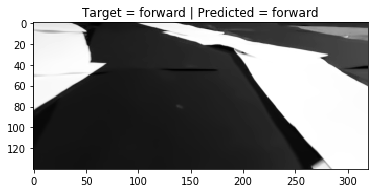

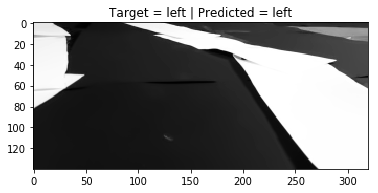

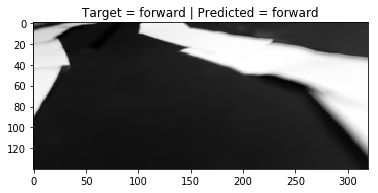

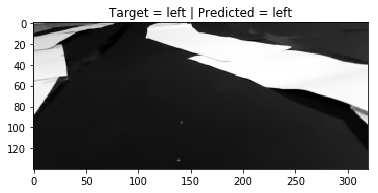

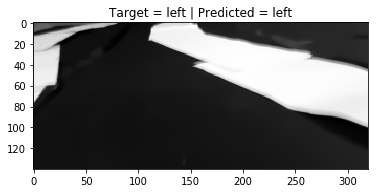

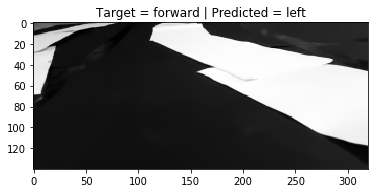

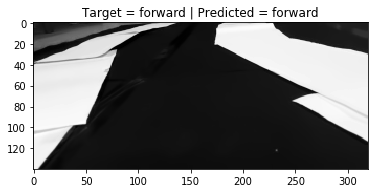

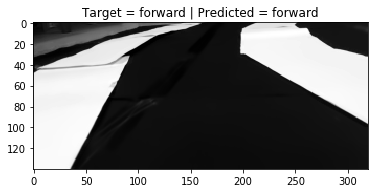

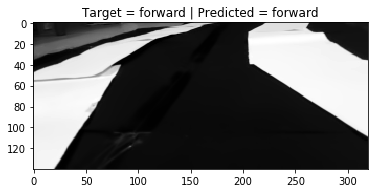

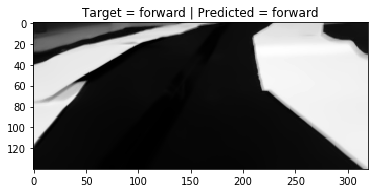

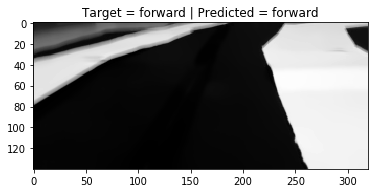

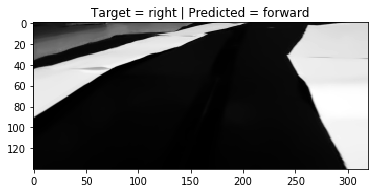

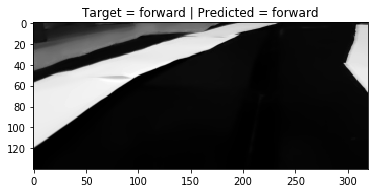

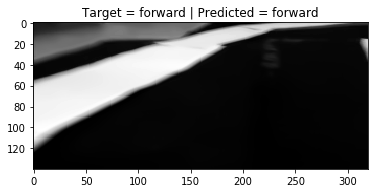

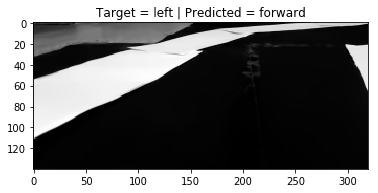

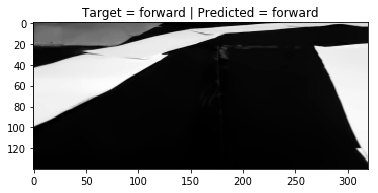

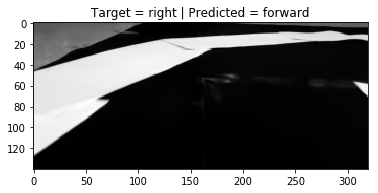

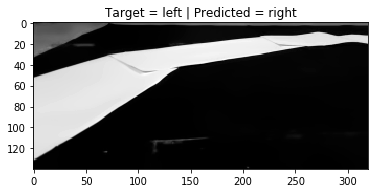

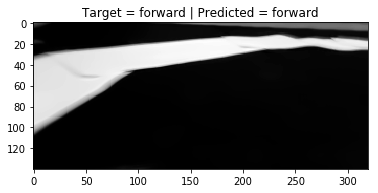

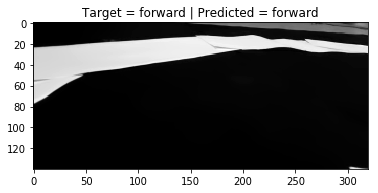

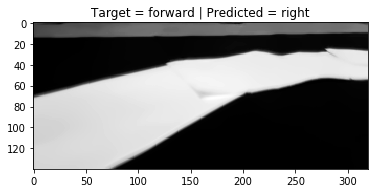

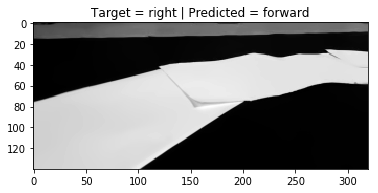

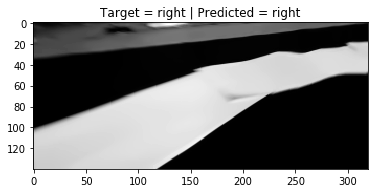

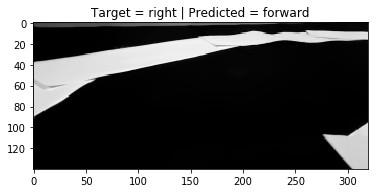

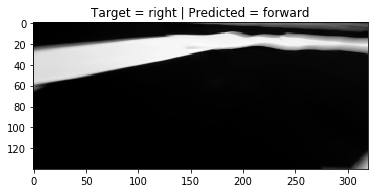

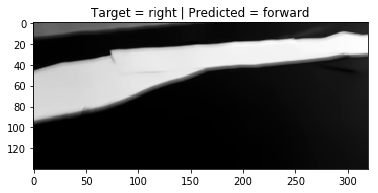

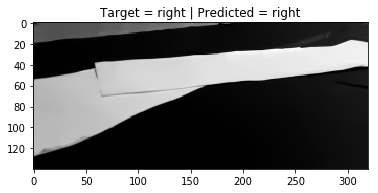

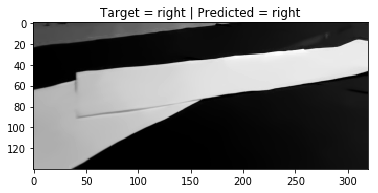

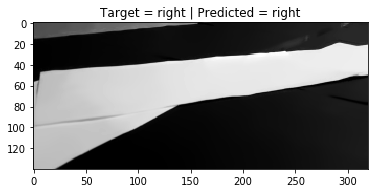

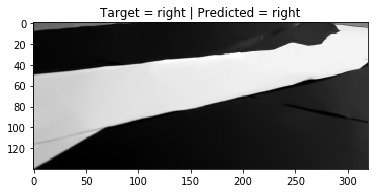

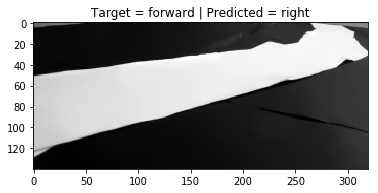

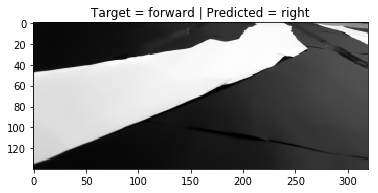

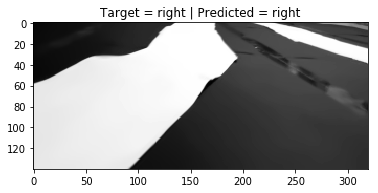

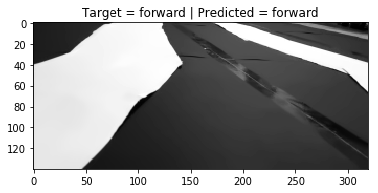

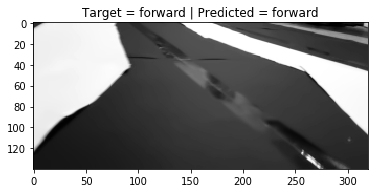

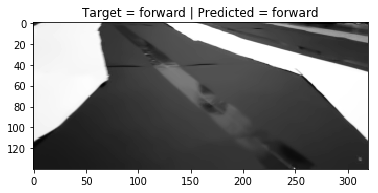

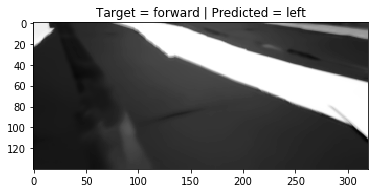

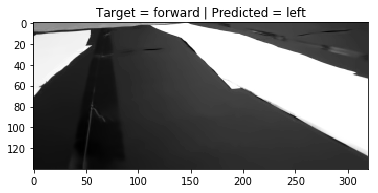

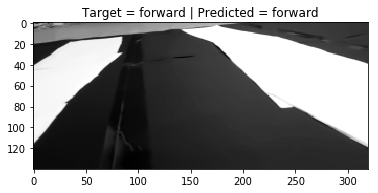

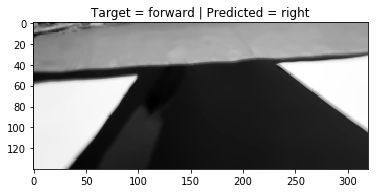

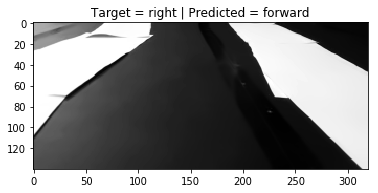

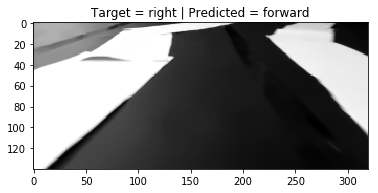

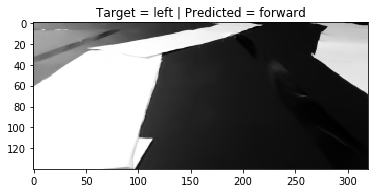

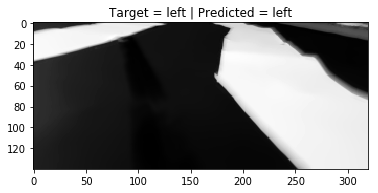

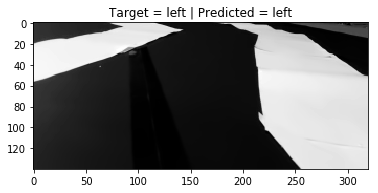

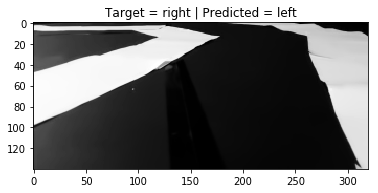

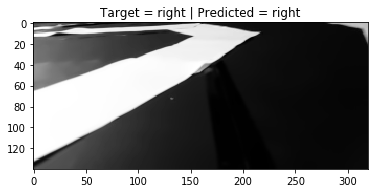

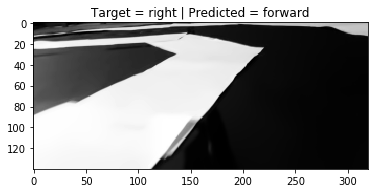

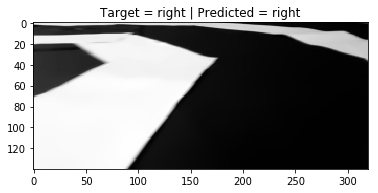

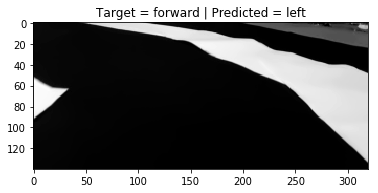

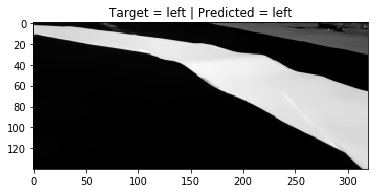

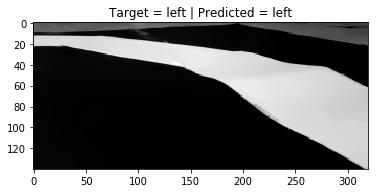

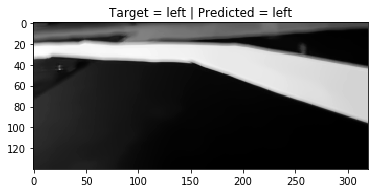

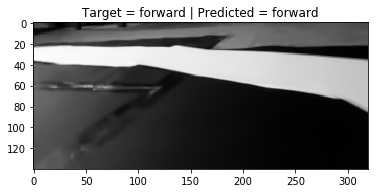

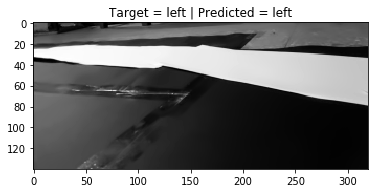

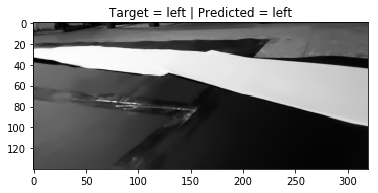

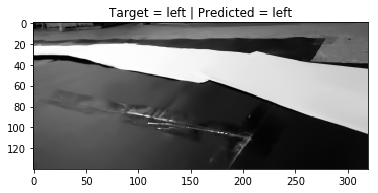

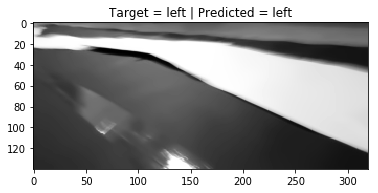

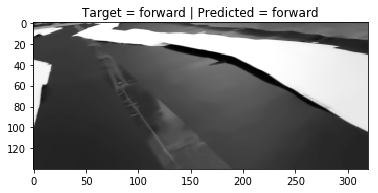

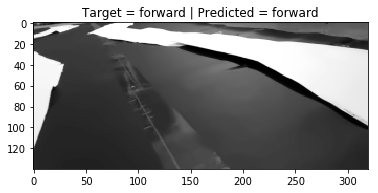

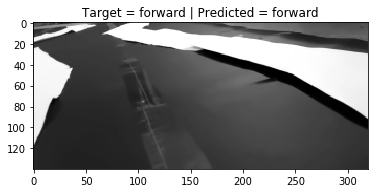

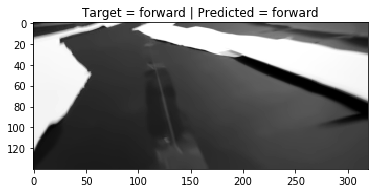

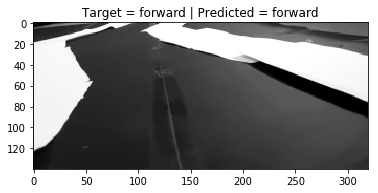

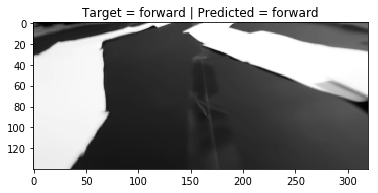

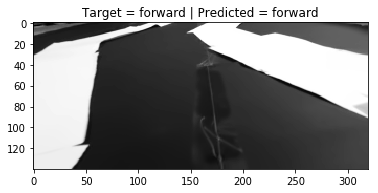

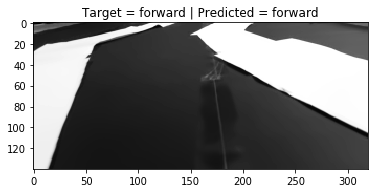

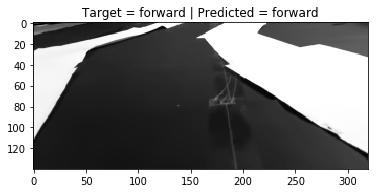

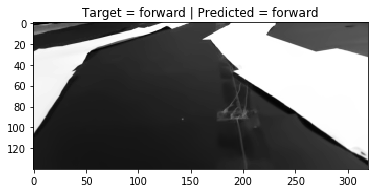

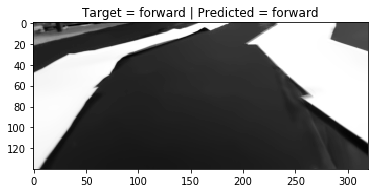

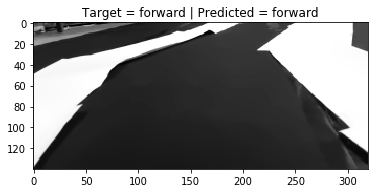

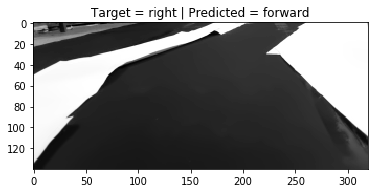

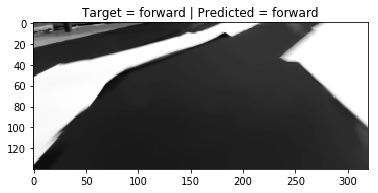

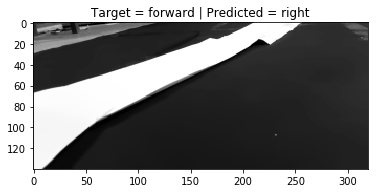

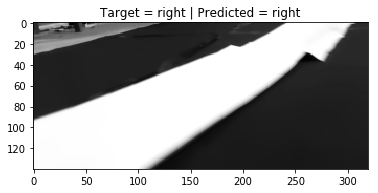

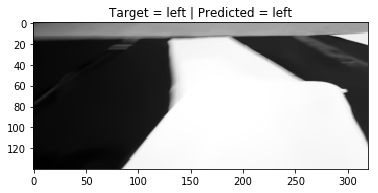

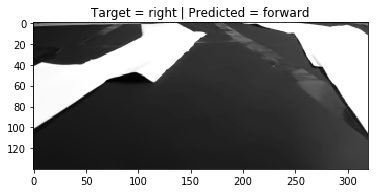

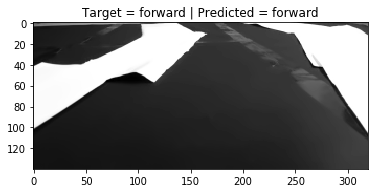

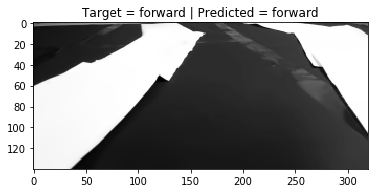

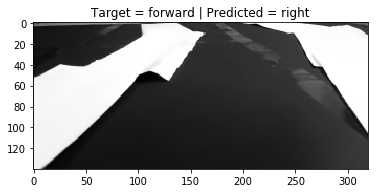

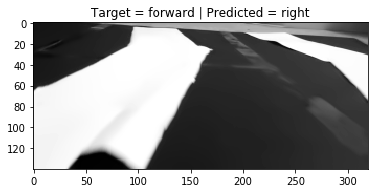

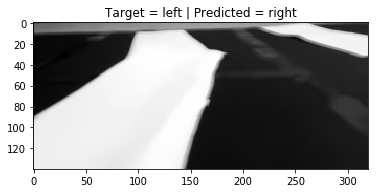

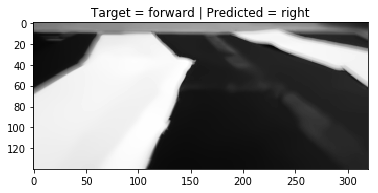

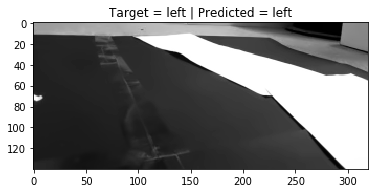

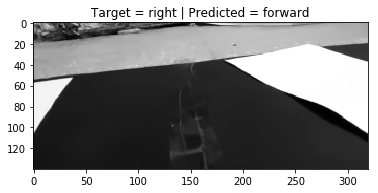

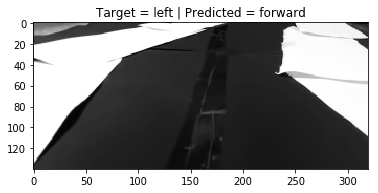

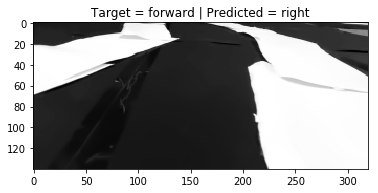

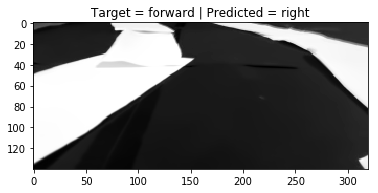

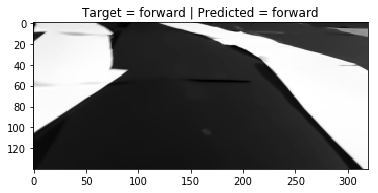

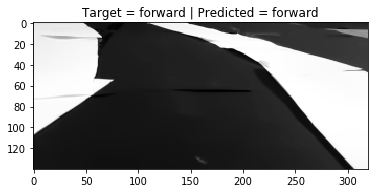

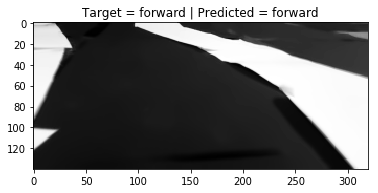

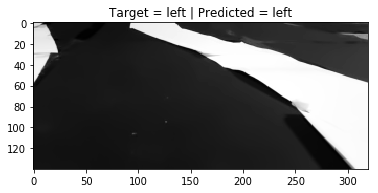

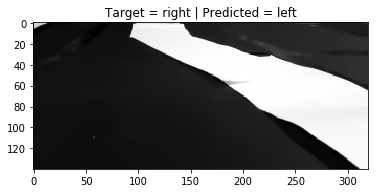

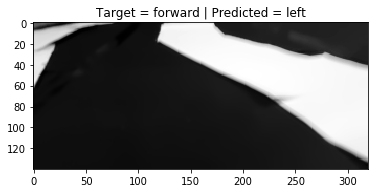

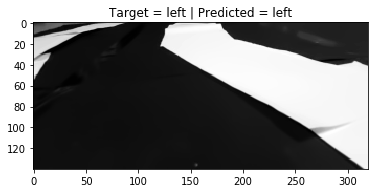

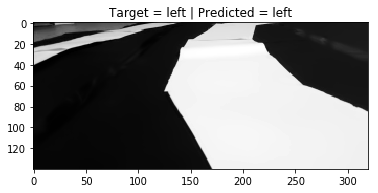

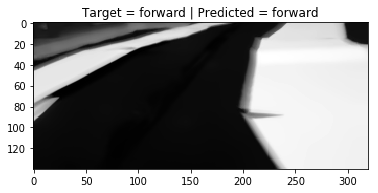

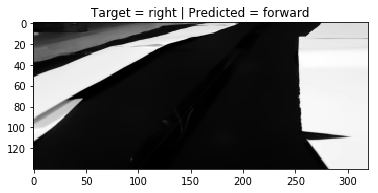

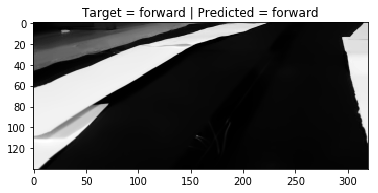

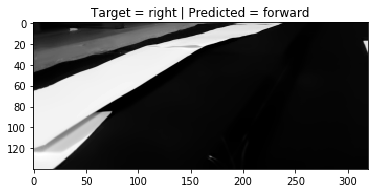

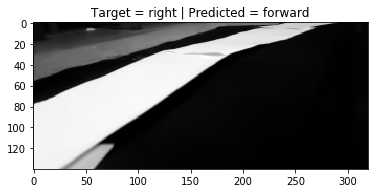

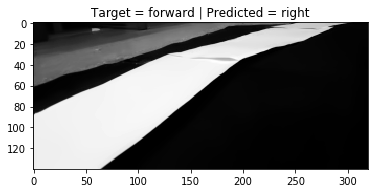

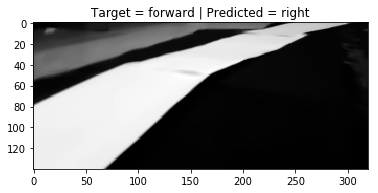

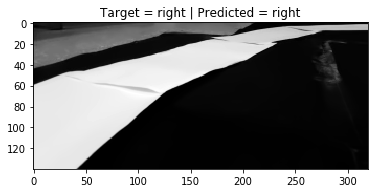

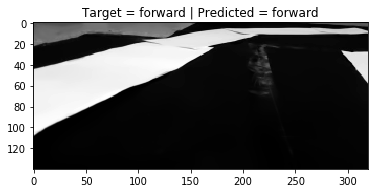

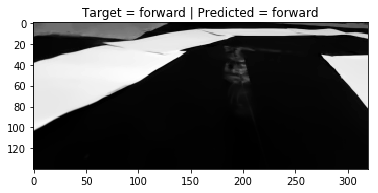

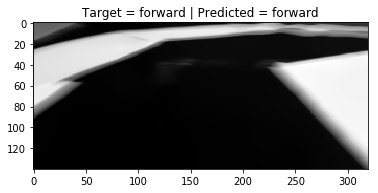

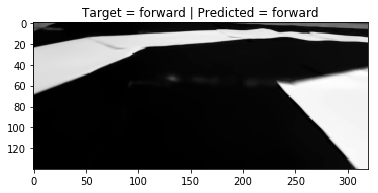

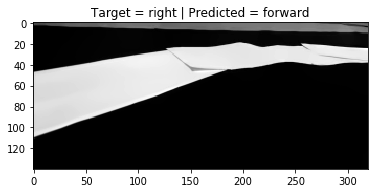

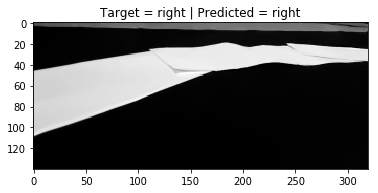

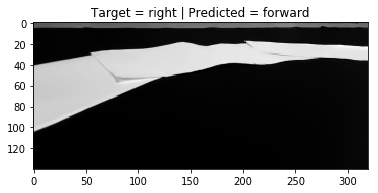

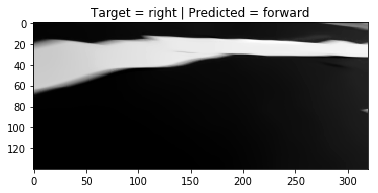

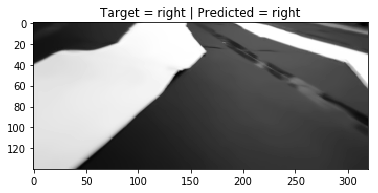

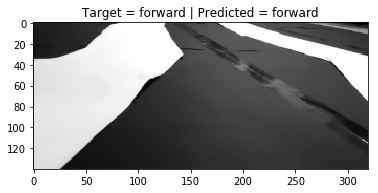

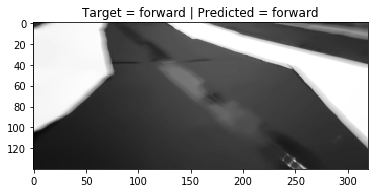

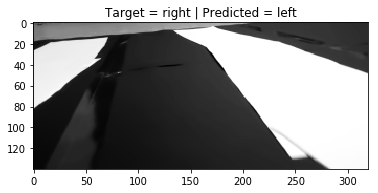

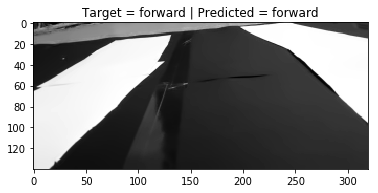

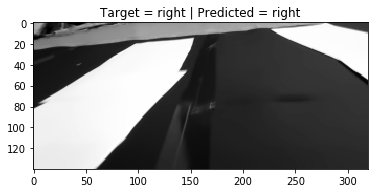

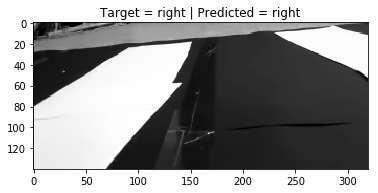

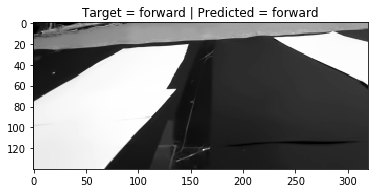

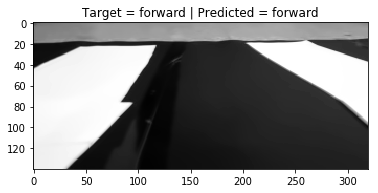

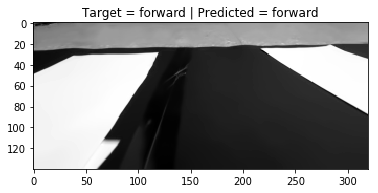

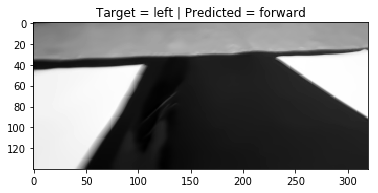

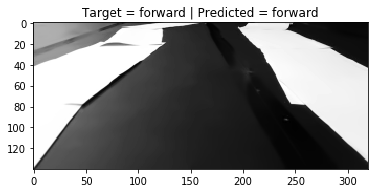

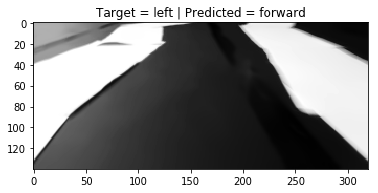

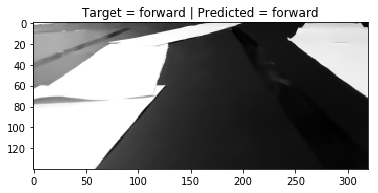

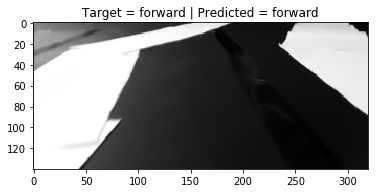

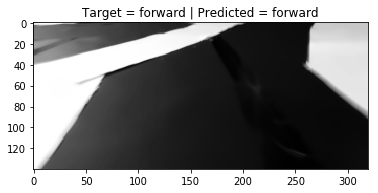

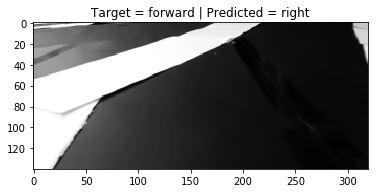

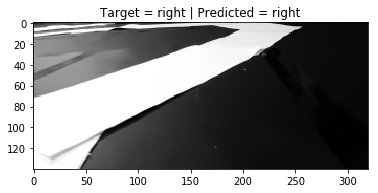

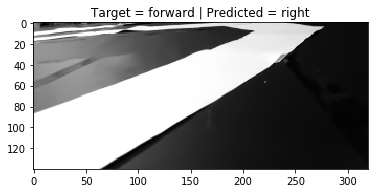

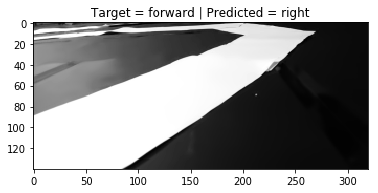

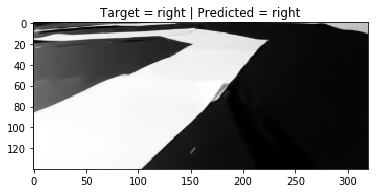

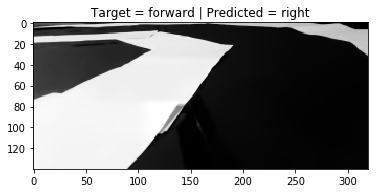

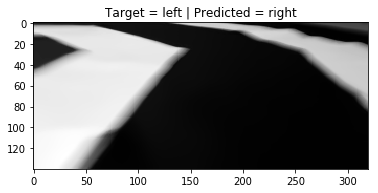

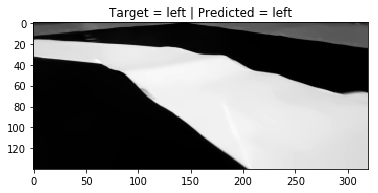

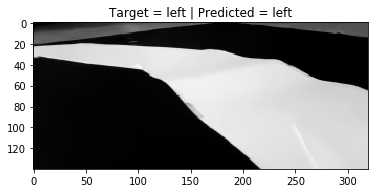

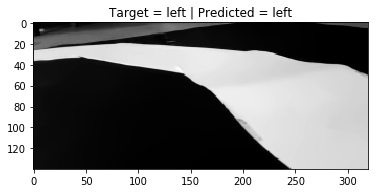

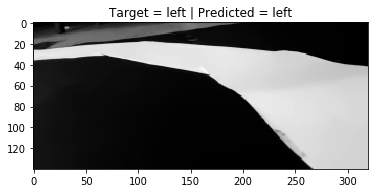

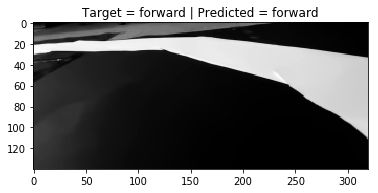

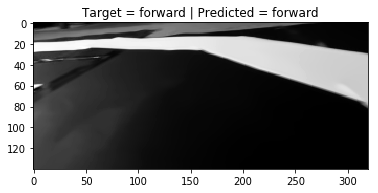

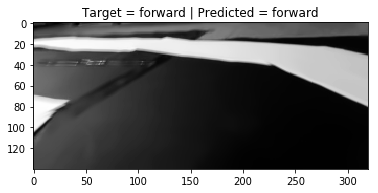

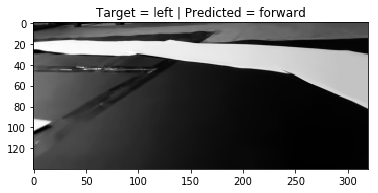

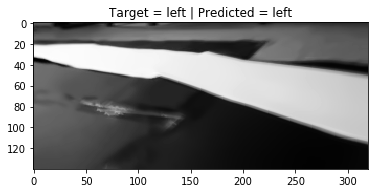

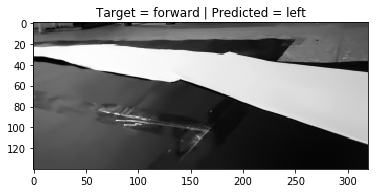

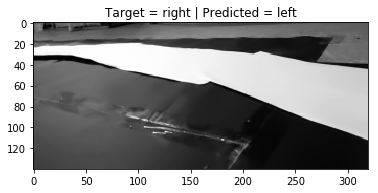

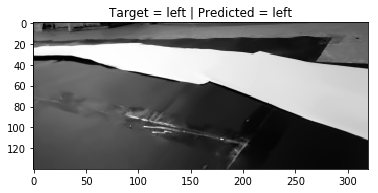

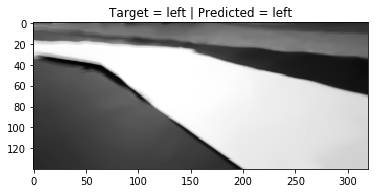

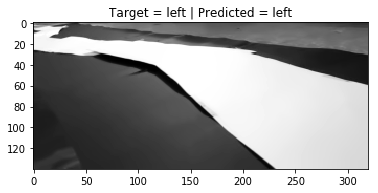

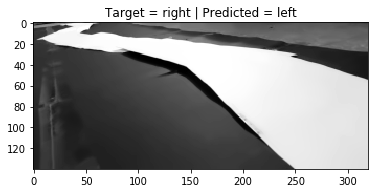

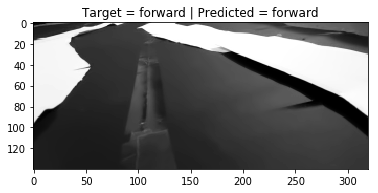

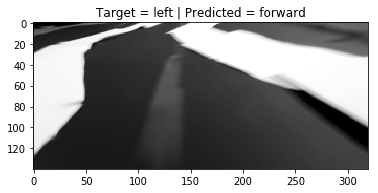

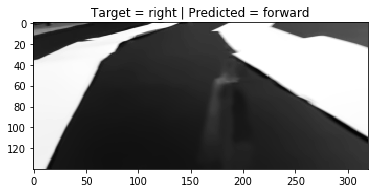

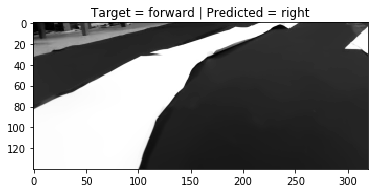

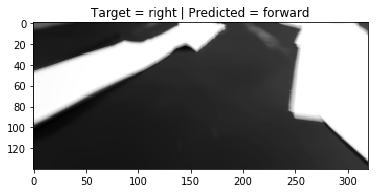

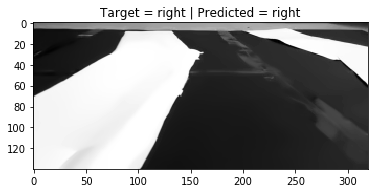

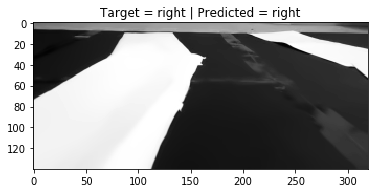

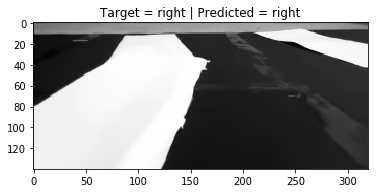

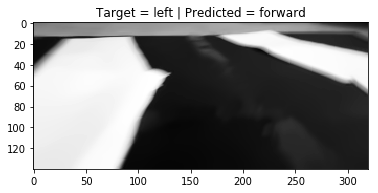

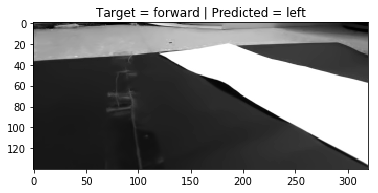

In [18]:
# test the network

correct = 0
total = 0
confusion_matrix = np.zeros((output_nodes, output_nodes))

for record in test_X:
    target_ans = int(test_Y[total])
    total = total + 1
    #sample = cv2.cvtColor(np.reshape(record, (45,80, 3)), cv2.COLOR_BGR2GRAY)
    sample = record.reshape((record.size,1))
    input_list = (np.asfarray(sample[:]) / 255.0 ) 
    #input_list = np.resize(input_list, (np.size(input_list),1))

    output_arr = net.querry(input_list)
    predicted_ans = np.argmax(output_arr)

    confusion_matrix[target_ans][predicted_ans] = confusion_matrix[target_ans][predicted_ans] + 1

    if target_ans == predicted_ans:
        correct = correct + 1
        
    img = np.reshape(record, (row,col))
    plt.imshow(img, cmap='gray')
    plt.title("Target = "+ labels[target_ans] + " | Predicted = "+ labels[predicted_ans])
    plt.show()
    
    pass

In [19]:
# Performance accuracy 

accuracy = (correct/total) * 100
print("\nAccuracy = "+ str(accuracy) + "%\n")

# Confusion Matrix
for i in range(output_nodes):
    confusion_matrix[i] = np.round((confusion_matrix[i]/np.sum(confusion_matrix[i])) * 100, 2)
print("Confusion Matrix : \n")
print(confusion_matrix)


Accuracy = 55.769230769230774%

Confusion Matrix : 

[[66.32 13.68 20.  ]
 [34.   56.   10.  ]
 [49.21 11.11 39.68]]


In [20]:
#print(net.wih, net.who)
print(np.shape(net.wih), np.shape(net.who))

(64, 44800) (3, 64)


In [21]:
np.savetxt("wih2.csv", net.wih, delimiter = ",")
np.savetxt("who2.csv", net.who, delimiter = ",")

In [1]:
clear all